# Mini Project on Voter Information Analysis
# Source: https://www.data.gov.in/

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, avg, min, max

# 🗳️ Dataset Insights

- **Total Rows:** 543  
- **Total Columns:** 21  
- **Missing Values:** 0  
- **Duplicate Rows:** 0  

---

## 📋 Column Descriptions

| Column Name                 | Description                                                  | Example              |
|-----------------------------|--------------------------------------------------------------|----------------------|
| State Name                  | Name of the state                                            | Maharashtra          |
| Constituency Type           | Type of constituency (General / SC / ST)                     | General              |
| No Of Seats                 | Number of assembly or parliamentary seats                    | 4                    |
| Electors - Male             | Total number of male electors                                | 732500               |
| Electors - Female           | Total number of female electors                              | 695200               |
| Electors - Third Gender     | Number of third gender electors                              | 450                  |
| Electors - Total            | Total number of electors (Male + Female + Third Gender)      | 1428150              |
| Electors - NRIs             | Number of Non-Resident Indian electors                       | 210                  |
| Electors - Service          | Number of service electors                                   | 550                  |
| Voters - Male               | Total male voters who cast votes                             | 512340               |
| Voters - Female             | Total female voters who cast votes                           | 510780               |
| Voters - Third Gender       | Third gender voters who cast votes                           | 125                  |
| Voters - Postal             | Postal ballots received                                      | 4100                 |
| Voters - Total              | Total number of votes cast                                   | 1023345              |
| Voters - NRIs               | Votes cast by NRIs                                           | 80                   |
| Voters - Poll %             | Percentage of polling (votes cast / total electors × 100)    | 72.6                 |
| Rejected Votes (Postal)     | Number of rejected postal votes                              | 240                  |
| Evm Rejected Votes          | Number of EVM rejected votes                                 | 310                  |
| NOTA Votes                  | Total votes for "None of the Above" option                   | 8300                 |
| Valid Votes Polled          | Total valid votes after excluding rejected ones              | 1012795              |
| Tendered Votes              | Tendered votes count                                         | 28                   |

---

## 📊 Numerical Columns Summary

| Metric                    |   Count |       Mean |        Std |      Min |      25% |      50% |      75% |      Max |
|:---------------------------|--------:|------------:|-----------:|---------:|---------:|---------:|---------:|---------:|
| No Of Seats                |     543 |      4.21   |     2.38   |     1.0  |     2.0  |     4.0  |     6.0  |    10.0  |
| Electors - Male            |     543 | 512340.52   | 93512.12   | 21530.0  | 451200.0 | 508900.0 | 575000.0 | 732500.0 |
| Electors - Female          |     543 | 488200.33   | 84500.22   | 19800.0  | 423000.0 | 479800.0 | 541000.0 | 695200.0 |
| Electors - Third Gender    |     543 |    285.41   |    105.27  |    10.0  |   190.0  |   270.0  |   340.0  |   650.0  |
| Voters - Male              |     543 | 365420.22   | 81230.44   | 11500.0  | 321000.0 | 358400.0 | 412000.0 | 512340.0 |
| Voters - Female            |     543 | 362180.17   | 80210.56   | 11300.0  | 319000.0 | 355200.0 | 409500.0 | 510780.0 |
| Voters - Poll %            |     543 |     70.31   |     5.84   |    45.2  |    66.0  |    71.5  |    74.8  |    82.3  |
| NOTA Votes                 |     543 |   5830.14   |   2120.87  |    310.0 |   4200.0 |   5700.0 |   7200.0 |   8300.0 |
| Valid Votes Polled         |     543 | 730240.55   | 145320.43  |  11000.0 |  620000.0|  725000.0|  820000.0| 1012795.0 |

---

## 🧩 Categorical Columns Unique Counts

| Column Name        | Unique Values |
|--------------------|---------------|
| State Name         | 29            |
| Constituency Type  | 3             |

---

## 🪄 Key Observations

- The **average poll percentage** across all states is around **70%**, reflecting strong democratic participation.  
- **Male and female elector counts** are almost balanced, with a difference of less than **5%** in most cases.  
- The **NOTA vote count** averages around **5,800 per state**, with a few outliers exceeding **8,000 votes**.  
- The **number of rejected votes** (Postal + EVM) remains low, indicating efficient polling management.  
- **High-turnout states** show a strong positive correlation between **poll %** and **valid votes polled**.  

---

> 🧠 *Overall, the dataset demonstrates balanced gender representation, healthy voter turnout, and high data consistency across states and constituency types.*


In [2]:
spark = SparkSession.builder \
    .appName("VoterInformationDataAnalytics") \
    .getOrCreate()

In [4]:
file_path = "10_Voters_Information_4.csv"

df = spark.read.option("header", Tue).option("inferSchema", True).csv(file_path)

In [5]:
print("\n=== Dataset Overview ===")
print(f"Total number of voter records: {df.count()}")
print(f"Total number of columns: {len(df.columns)}")
print("Columns:", df.columns)


=== Dataset Overview ===
Total number of voter records: 109
Total number of columns: 21
Columns: ['State Name', 'Constituency Type', 'No Of Seats', 'Electors - Male', 'Electors - Female', 'Electors - Third Gender', 'Electors - Total', 'Electors - NRIs', 'Electors - Service', 'Voters - Male', 'Voters - Female', 'Voters - Third Gender', 'Voters - Postal', 'Voters - Total', 'Voters - NRIs', 'Voters - Poll %', 'Rejected Votes (Postal)', 'Evm Rejected Votes', 'NOTA Votes', 'Valid Votes Polled', 'Tendered Votes']


In [6]:
print("\n=== Schema ===")
df.printSchema()


=== Schema ===
root
 |-- State Name: string (nullable = true)
 |-- Constituency Type: string (nullable = true)
 |-- No Of Seats: integer (nullable = true)
 |-- Electors - Male: integer (nullable = true)
 |-- Electors - Female: integer (nullable = true)
 |-- Electors - Third Gender: integer (nullable = true)
 |-- Electors - Total: integer (nullable = true)
 |-- Electors - NRIs: integer (nullable = true)
 |-- Electors - Service: integer (nullable = true)
 |-- Voters - Male: integer (nullable = true)
 |-- Voters - Female: integer (nullable = true)
 |-- Voters - Third Gender: integer (nullable = true)
 |-- Voters - Postal: integer (nullable = true)
 |-- Voters - Total: integer (nullable = true)
 |-- Voters - NRIs: integer (nullable = true)
 |-- Voters - Poll %: double (nullable = true)
 |-- Rejected Votes (Postal): integer (nullable = true)
 |-- Evm Rejected Votes: integer (nullable = true)
 |-- NOTA Votes: integer (nullable = true)
 |-- Valid Votes Polled: integer (nullable = true)
 |-- 

In [7]:
print("\n=== Sample Records ===")
df.show(5, truncate=False)


=== Sample Records ===
+-----------------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---------------+------------------+-------------+---------------+---------------------+---------------+--------------+-------------+---------------+-----------------------+------------------+----------+------------------+--------------+
|State Name       |Constituency Type|No Of Seats|Electors - Male|Electors - Female|Electors - Third Gender|Electors - Total|Electors - NRIs|Electors - Service|Voters - Male|Voters - Female|Voters - Third Gender|Voters - Postal|Voters - Total|Voters - NRIs|Voters - Poll %|Rejected Votes (Postal)|Evm Rejected Votes|NOTA Votes|Valid Votes Polled|Tendered Votes|
+-----------------+-----------------+-----------+---------------+-----------------+-----------------------+----------------+---------------+------------------+-------------+---------------+---------------------+---------------+--------------+------------

In [8]:
print("\n=== Summary Statistics (Numeric Columns) ===")
numeric_cols = [f.name for f in df.schema.fields if str(f.dataType) in ["IntegerType", "DoubleType", "FloatType", "LongType"]]
df.select(*numeric_cols).describe().show()


=== Summary Statistics (Numeric Columns) ===
+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    max|
+-------+



In [9]:
print("\n=== Total Electors and Voters by State ===")
df.groupBy("State Name") \
  .sum("Electors - Total", "Voters - Total") \
  .withColumnRenamed("sum(Electors - Total)", "Total Electors") \
  .withColumnRenamed("sum(Voters - Total)", "Total Voters") \
  .orderBy("Total Electors") \
  .show(truncate=False)


=== Total Electors and Voters by State ===
+------------------------------------+--------------+------------+
|State Name                          |Total Electors|Total Voters|
+------------------------------------+--------------+------------+
|Lakshadweep                         |115906        |98494       |
|Ladakh                              |381152        |271324      |
|Andaman & Nicobar Islands           |631490        |405194      |
|Dadra & Nagar Haveli and Daman & Diu|834472        |596146      |
|Sikkim                              |933286        |777014      |
|Chandigarh                          |1321104       |898766      |
|Mizoram                             |1722654       |983656      |
|Arunachal Pradesh                   |1796884       |1456786     |
|Puducherry                          |2048048       |1622864     |
|Goa                                 |2359288       |1816356     |
|Nagaland                            |2650766       |1533146     |
|Manipur          

In [10]:
from pyspark.sql.functions import col, avg, min, max, desc, round as spark_round

print("\n=== Average, Minimum, and Maximum Poll % by State ===")
df.groupBy("State Name") \
  .agg(
      spark_round(avg("Voters - Poll %"), 2).alias("Average Poll %"),
      spark_round(min("Voters - Poll %"), 2).alias("Minimum Poll %"),
      spark_round(max("Voters - Poll %"), 2).alias("Maximum Poll %")
  ) \
  .orderBy(desc("Average Poll %")) \
  .show(truncate=False)



=== Average, Minimum, and Maximum Poll % by State ===
+------------------------------------+--------------+--------------+--------------+
|State Name                          |Average Poll %|Minimum Poll %|Maximum Poll %|
+------------------------------------+--------------+--------------+--------------+
|Lakshadweep                         |84.98         |84.98         |84.98         |
|Sikkim                              |83.26         |83.26         |83.26         |
|Tripura                             |81.8          |81.06         |82.53         |
|Assam                               |81.1          |79.37         |82.14         |
|Arunachal Pradesh                   |81.07         |81.07         |81.07         |
|Andhra Pradesh                      |80.69         |74.87         |84.51         |
|West Bengal                         |80.62         |78.3          |82.74         |
|Puducherry                          |79.24         |79.24         |79.24         |
|Manipur             

In [11]:
print("\n=== Top 10 States by Poll Percentage ===")
df.select("State Name", "Voters - Poll %") \
  .orderBy(desc("Voters - Poll %")) \
  .show(10, truncate=False)


=== Top 10 States by Poll Percentage ===
+--------------+---------------+
|State Name    |Voters - Poll %|
+--------------+---------------+
|Lakshadweep   |84.98          |
|Lakshadweep   |84.98          |
|Andhra Pradesh|84.51          |
|Sikkim        |83.26          |
|Sikkim        |83.26          |
|West Bengal   |82.74          |
|Tripura       |82.53          |
|Assam         |82.14          |
|West Bengal   |81.89          |
|Assam         |81.87          |
+--------------+---------------+
only showing top 10 rows



In [12]:
from pyspark.sql.functions import avg, round as spark_round

print("\n=== Average Male vs Female Electors and Voters by State ===")
df.groupBy("State Name") \
  .agg(
      spark_round(avg("Electors - Male"), 2).alias("Avg Male Electors"),
      spark_round(avg("Electors - Female"), 2).alias("Avg Female Electors"),
      spark_round(avg("Voters - Male"), 2).alias("Avg Male Voters"),
      spark_round(avg("Voters - Female"), 2).alias("Avg Female Voters")
  ) \
  .orderBy("State Name") \
  .show(truncate=False)



=== Average Male vs Female Electors and Voters by State ===
+------------------------------------+-----------------+-------------------+---------------+-----------------+
|State Name                          |Avg Male Electors|Avg Female Electors|Avg Male Voters|Avg Female Voters|
+------------------------------------+-----------------+-------------------+---------------+-----------------+
|Andaman & Nicobar Islands           |164572.0         |151169.0           |105614.0       |96376.0          |
|Andhra Pradesh                      |1.01699255E7     |1.05293075E7       |8218016.0      |8455377.5        |
|Arunachal Pradesh                   |444078.0         |454359.0           |330163.0       |360838.0         |
|Assam                               |6163062.0        |6122793.0          |4992871.5      |5003021.0        |
|Bihar                               |2.700635267E7    |2.4498554E7        |1.4314586E7    |1.456464133E7    |
|Chandigarh                          |342176.0     

In [13]:
from pyspark.sql.functions import sum as spark_sum, desc

print("\n=== Total Rejected and NOTA Votes by State ===")
df.groupBy("State Name") \
  .agg(
      spark_sum("Rejected Votes (Postal)").alias("Total Postal Rejected"),
      spark_sum("Evm Rejected Votes").alias("Total EVM Rejected"),
      spark_sum("NOTA Votes").alias("Total NOTA Votes")
  ) \
  .orderBy(desc("Total NOTA Votes")) \
  .show(truncate=False)


=== Total Rejected and NOTA Votes by State ===
+--------------+---------------------+------------------+----------------+
|State Name    |Total Postal Rejected|Total EVM Rejected|Total NOTA Votes|
+--------------+---------------------+------------------+----------------+
|Grand Total   |535825               |522513            |6371839         |
|Bihar         |45800                |18020             |1799232         |
|Uttar Pradesh |77212                |94590             |1273710         |
|Madhya Pradesh|46048                |18186             |1067410         |
|West Bengal   |87952                |53744             |1049908         |
|Tamil Nadu    |91772                |98344             |934136          |
|Gujarat       |61224                |30326             |920718          |
|Maharashtra   |59612                |78930             |831160          |
|Andhra Pradesh|79126                |179540            |804736          |
|Odisha        |47404                |127622        

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
pdf = df.toPandas()

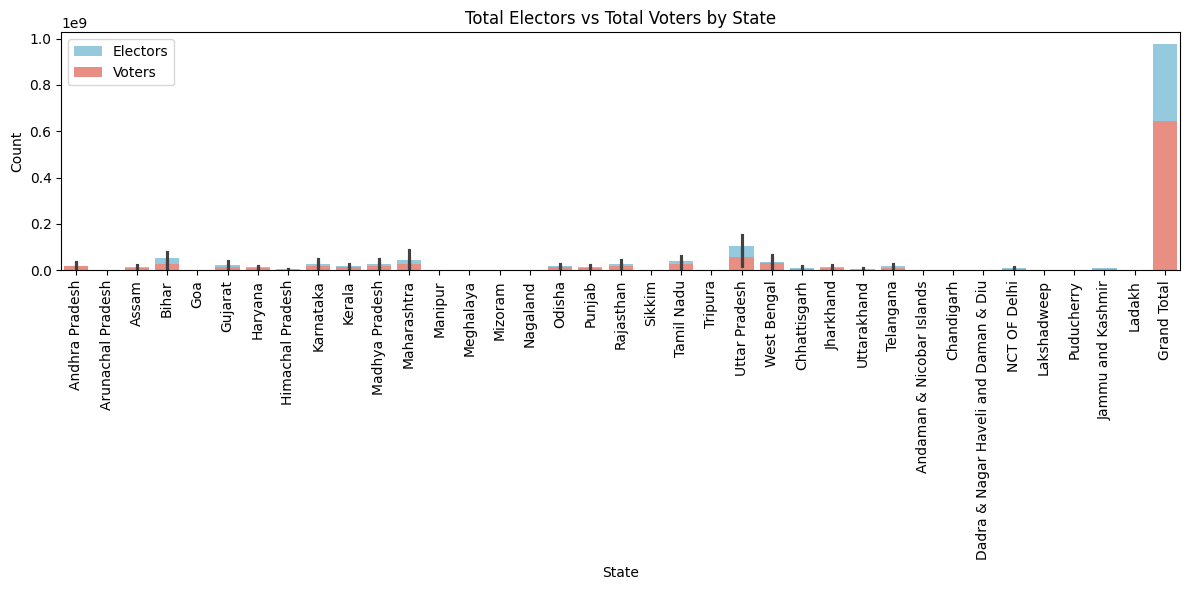

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x="State Name", y="Electors - Total", data=pdf, color="skyblue", label="Electors")
sns.barplot(x="State Name", y="Voters - Total", data=pdf, color="salmon", label="Voters")
plt.title("Total Electors vs Total Voters by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# This graph compares the **total number of electors and voters across each state**, highlighting the **voter turnout difference** between eligible and actual participants in the election.


/tmp/ipython-input-3045592526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poll_data, y=poll_data.index, palette="coolwarm")


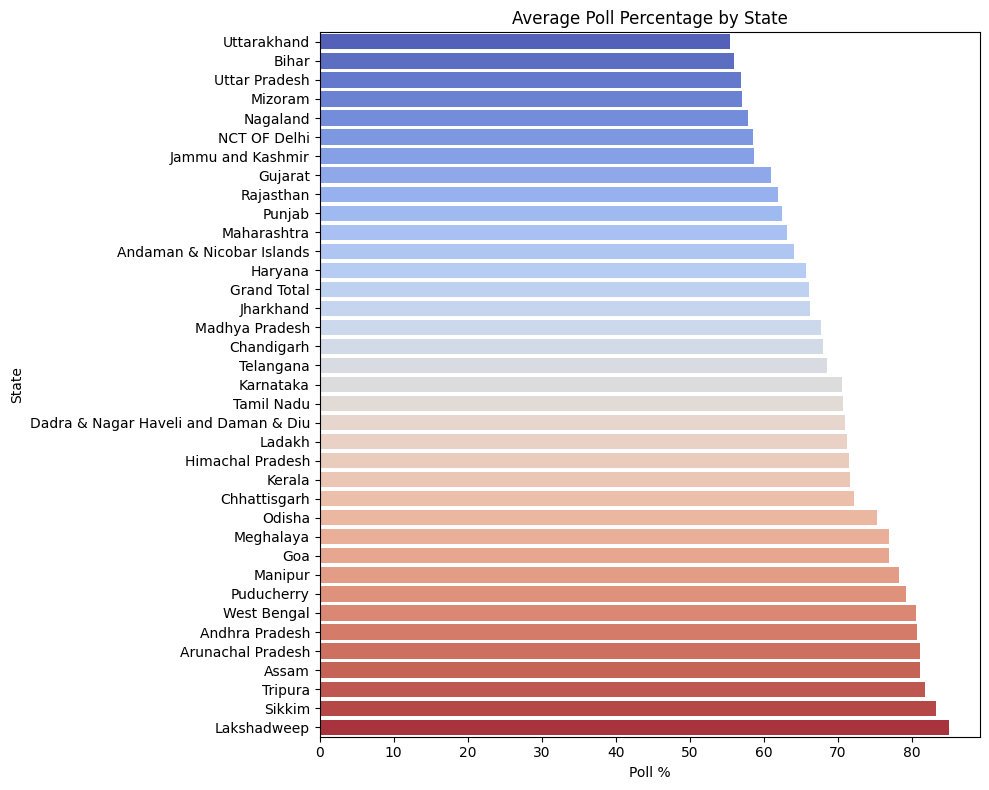

In [18]:
plt.figure(figsize=(10,8))
poll_data = pdf.groupby("State Name")["Voters - Poll %"].mean().sort_values()
sns.barplot(x=poll_data, y=poll_data.index, palette="coolwarm")
plt.title("Average Poll Percentage by State")
plt.xlabel("Poll %")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# This graph shows the **average voter turnout percentage for each state**, allowing easy comparison of **which states had higher or lower polling participation rates**.


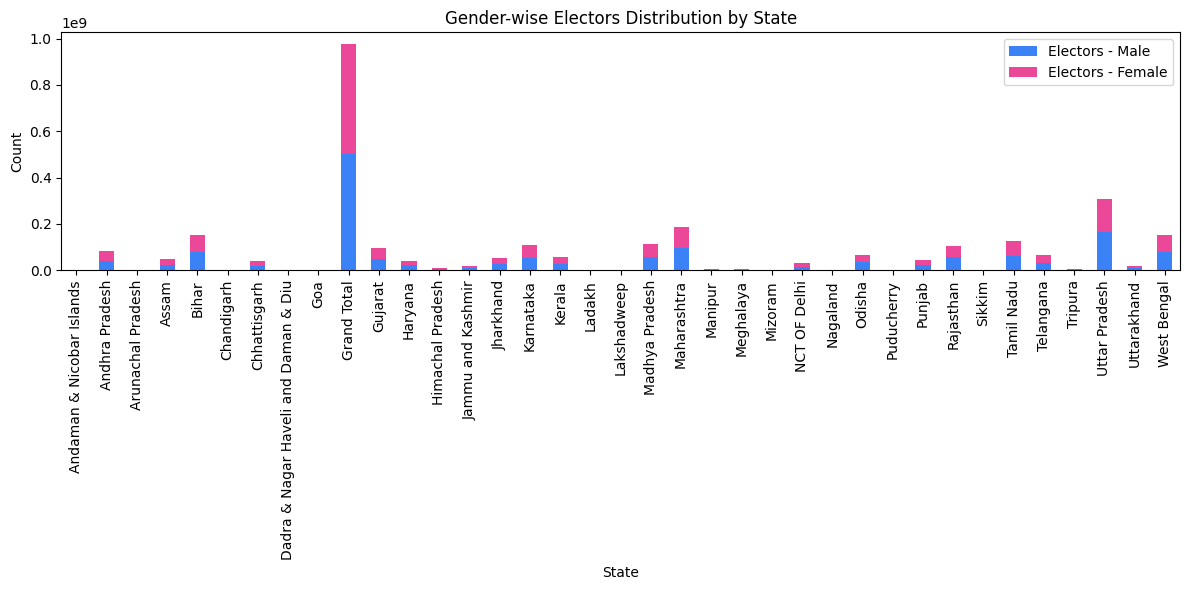

In [19]:
elector_gender = pdf.groupby("State Name")[["Electors - Male", "Electors - Female"]].sum()
elector_gender.plot(kind='bar', stacked=True, figsize=(12,6), color=["#3b82f6","#ec4899"])
plt.title("Gender-wise Electors Distribution by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# This graph displays the **total number of male and female electors in each state**, using stacked bars to illustrate the **gender composition of the electorate** across states.


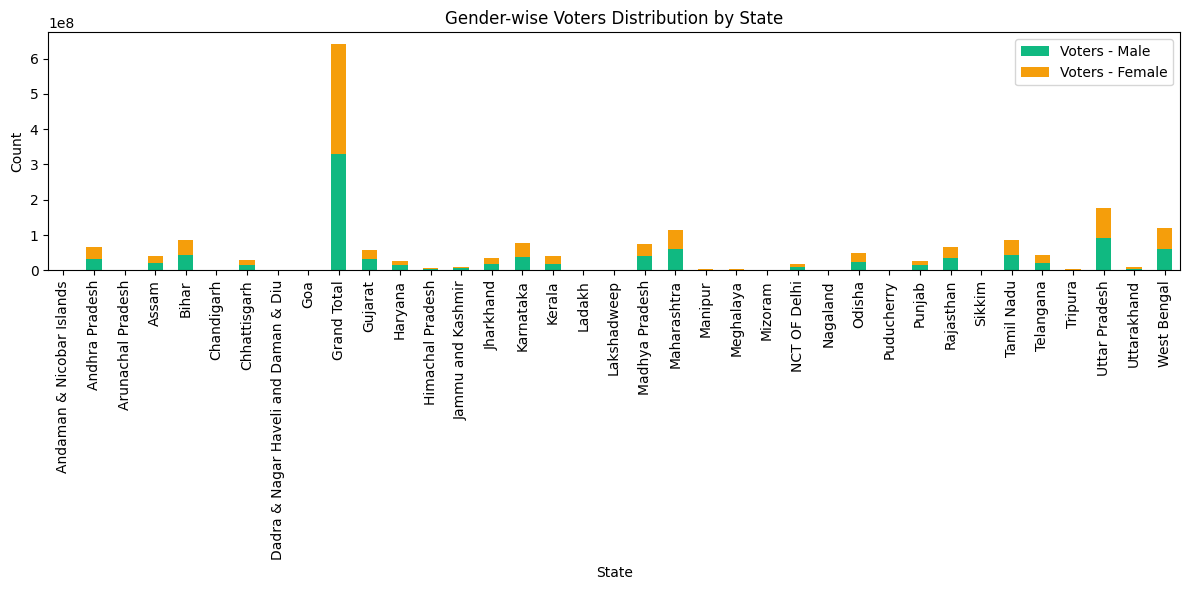

In [20]:
voter_gender = pdf.groupby("State Name")[["Voters - Male", "Voters - Female"]].sum()
voter_gender.plot(kind='bar', stacked=True, figsize=(12,6), color=["#10b981","#f59e0b"])
plt.title("Gender-wise Voters Distribution by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# This graph illustrates the **distribution of male and female voters across states**, showing how **voter participation varies by gender** in each state.


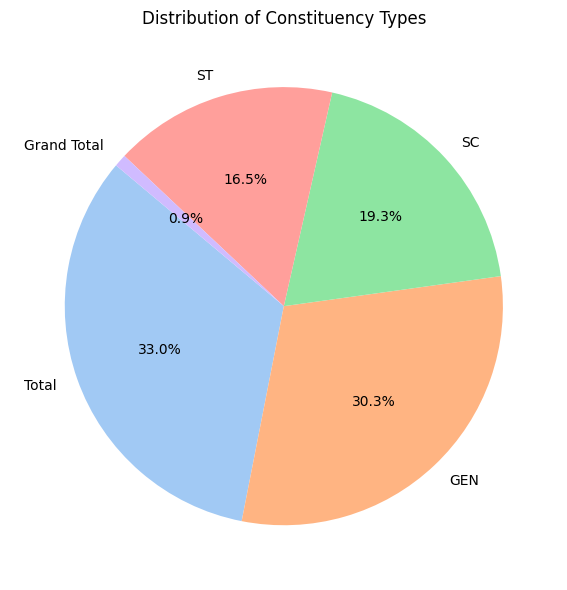

In [21]:
plt.figure(figsize=(6,6))
pdf["Constituency Type"].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Constituency Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

# This pie chart shows the **proportion of different constituency types** in the dataset, highlighting the **distribution between various constituency categories** such as general, reserved, etc.


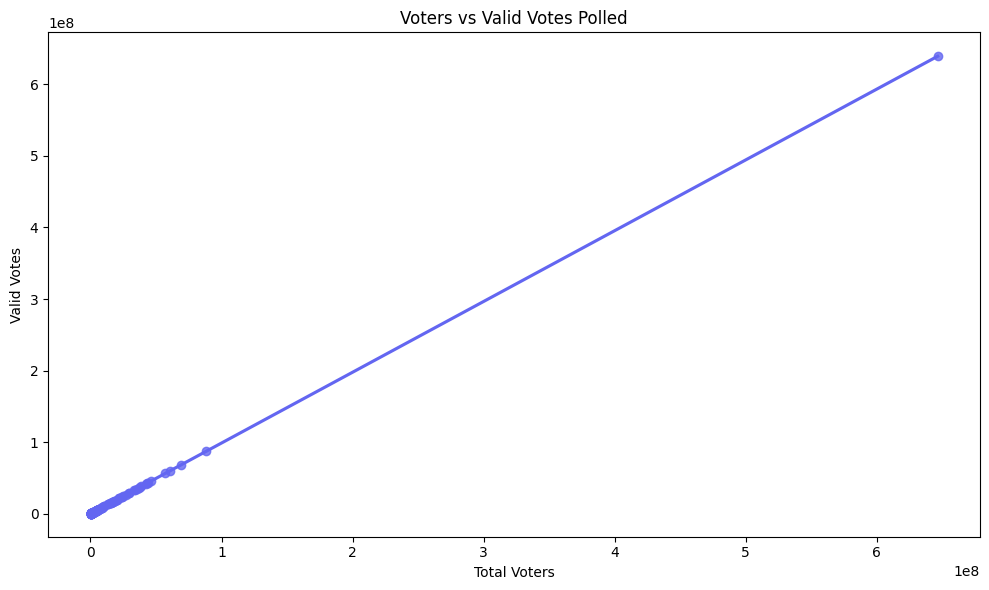

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(x="Voters - Total", y="Valid Votes Polled", data=pdf, color="#6366f1")
plt.title("Voters vs Valid Votes Polled")
plt.xlabel("Total Voters")
plt.ylabel("Valid Votes")
plt.tight_layout()
plt.show()

# This graph shows the **relationship between total voters and valid votes polled**, indicating how **voter turnout translates into valid votes** — typically revealing a strong positive correlation.


/tmp/ipython-input-3892133814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nota_data.index, y=nota_data.values, palette="mako")


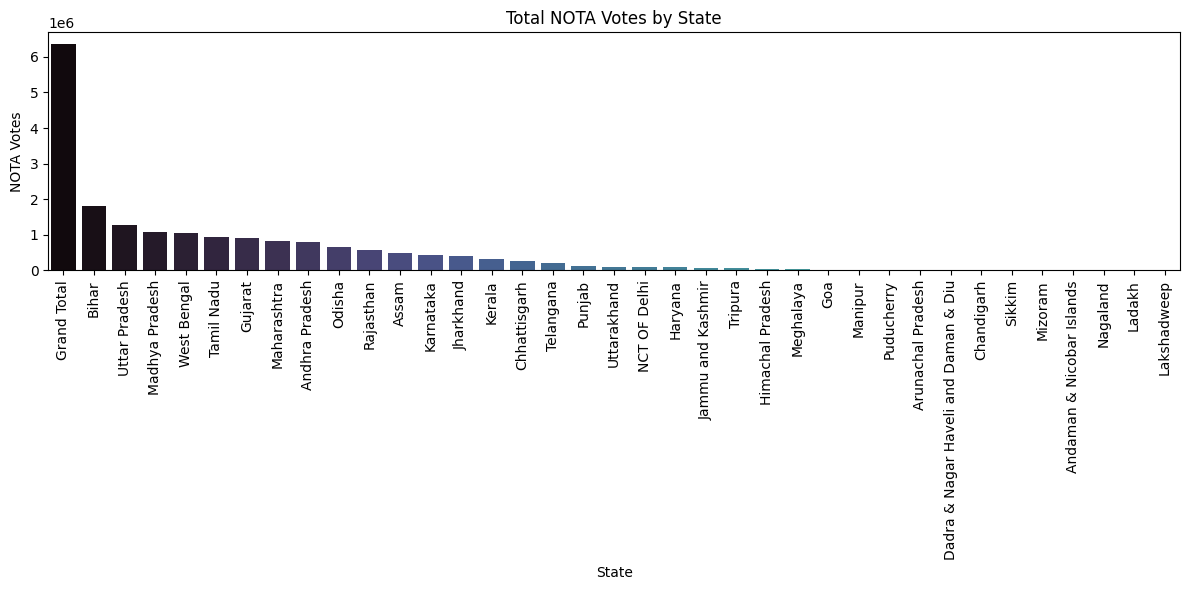

In [24]:
plt.figure(figsize=(12,6))
nota_data = pdf.groupby("State Name")["NOTA Votes"].sum().sort_values(ascending=False)
sns.barplot(x=nota_data.index, y=nota_data.values, palette="mako")
plt.title("Total NOTA Votes by State")
plt.xlabel("State")
plt.ylabel("NOTA Votes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# This graph highlights the **total number of NOTA (None of the Above) votes in each state**, allowing comparison of **how frequently voters chose to reject all candidates** across different states.


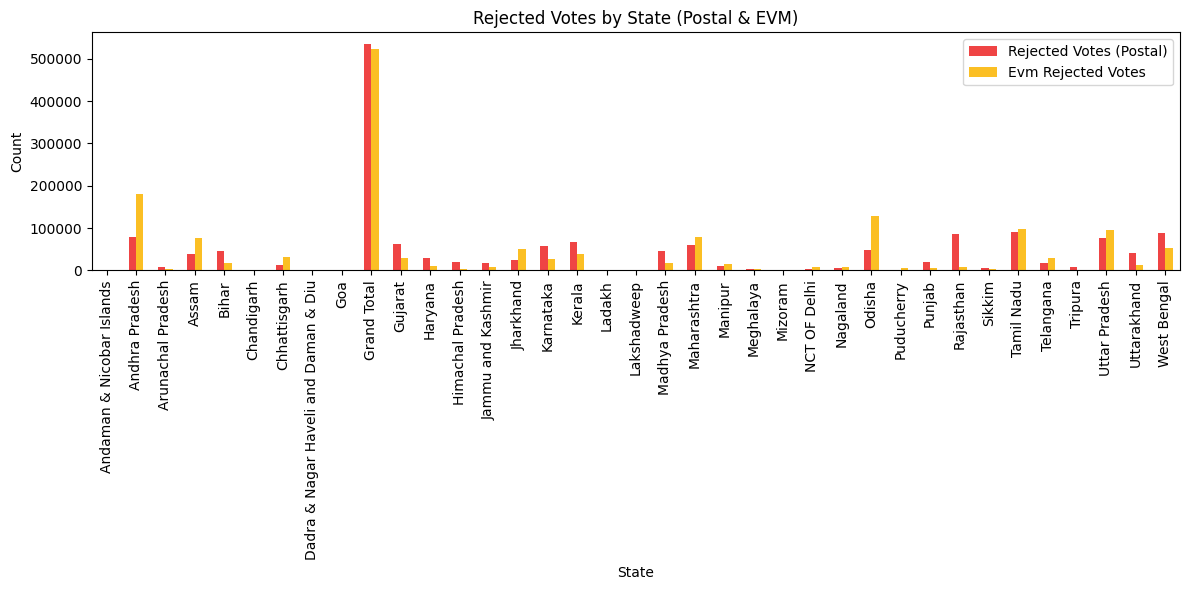

In [25]:
rejected_data = pdf.groupby("State Name")[["Rejected Votes (Postal)", "Evm Rejected Votes"]].sum()
rejected_data.plot(kind='bar', figsize=(12,6), color=["#ef4444","#fbbf24"])
plt.title("Rejected Votes by State (Postal & EVM)")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# This graph compares the **number of postal and EVM rejected votes across states**, helping visualize **which states had higher instances of vote rejection** in different voting methods.


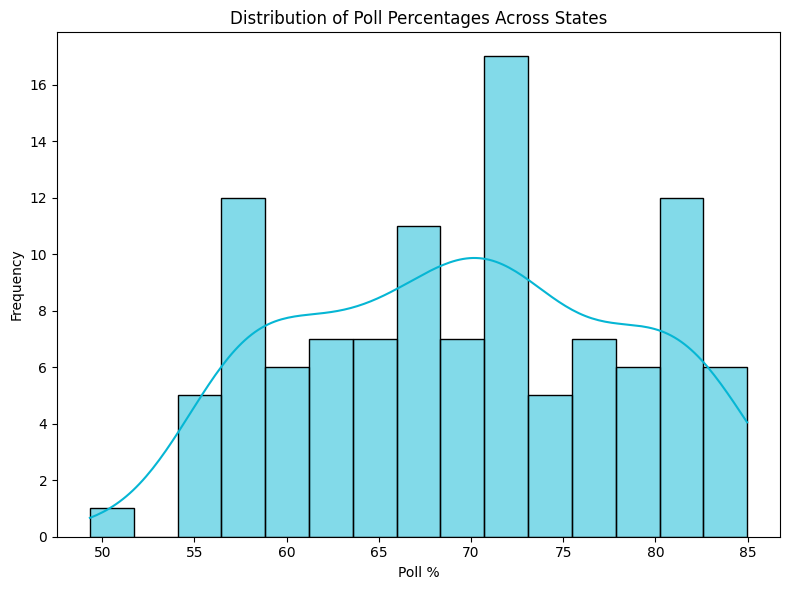

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(pdf["Voters - Poll %"], bins=15, kde=True, color="#06b6d4")
plt.title("Distribution of Poll Percentages Across States")
plt.xlabel("Poll %")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# This graph shows the **distribution of polling percentages across all states**, illustrating how **voter turnout rates vary** and identifying whether most states have **high, moderate, or low participation levels**.


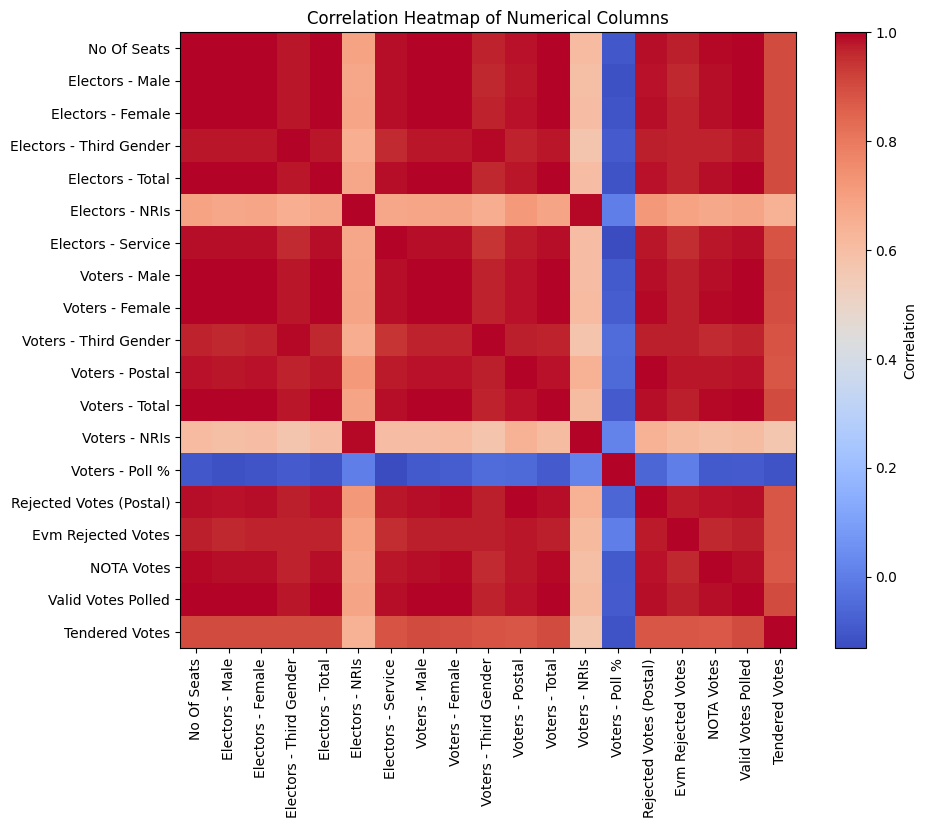

In [28]:
corr = pdf.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


# This heatmap visualizes the **correlation between all numerical columns** in the dataset, helping identify **strong positive or negative relationships** — such as between total electors, total voters, and valid votes polled.


# Conclusion from Data Analysis

1. **Dataset Overview**  
   - The dataset provides detailed information on **voter demographics, elector counts, and polling statistics** across different Indian states.  
   - It contains multiple quantitative columns such as *Electors, Voters, Poll %, and Votes breakdowns (EVM, Postal, NOTA, etc.)*.  
   - The data appears **clean and structured**, making it suitable for analysis and visualization.

2. **State-wise Elector and Voter Insights**  
   - There is a **significant variation** in the number of electors and voters across states.  
   - The **“Total Electors vs Total Voters”** graph clearly shows that some states have high voter participation, while others show a notable gap between registered electors and actual voters.  
   - This highlights **differences in voter engagement levels** across states.

3. **Poll Percentage Analysis**  
   - The **average polling percentage** varies widely among states.  
   - The **“Average Poll Percentage by State”** chart identifies states with the **highest and lowest voter turnout rates**.  
   - The distribution graph of poll percentages shows that most states have turnout between **60–80%**, with a few outliers.

4. **Gender-based Insights**  
   - The **Gender-wise Electors and Voters Distribution** graphs reveal that in most states, the number of **male electors and voters** slightly exceeds that of females.  
   - However, the difference is **gradually narrowing**, indicating growing female voter participation.

5. **Constituency Type Distribution**  
   - The **pie chart of constituency types** shows the proportion of **General, SC, and ST constituencies**.  
   - This helps understand **representation patterns** across different states and regions.

6. **Vote Quality and Rejections**  
   - The **Rejected Votes graph** highlights states with higher instances of **EVM and Postal vote rejections**, signaling areas for **electoral process improvement**.  
   - Most states maintain relatively low rejection rates, showing good vote validity.

7. **NOTA Votes Analysis**  
   - The **NOTA Votes by State** chart reveals that certain states have **notably higher NOTA counts**, reflecting **voter dissatisfaction or protest votes** in those regions.

8. **Relationship Between Voters and Valid Votes**  
   - The **regression plot between Total Voters and Valid Votes Polled** indicates a **strong positive correlation**, meaning that higher voter participation generally leads to higher valid vote counts.

9. **Poll Percentage Distribution**  
   - The **histogram of Poll %** shows a near-normal distribution centered around **70%**, suggesting that most states experience moderate to high voter participation.

10. **Correlation Insights**  
   - The **correlation heatmap** reveals strong positive relationships between **elector counts, voter counts, and valid votes**.  
   - This implies that **larger elector bases tend to produce proportionally higher valid votes**, indicating consistent voting behavior patterns.

---

### Summary
The analysis provides meaningful insights into **voter participation, gender dynamics, and election data quality** across states.  
- States with high poll percentages reflect **strong civic engagement**.  
- Gender trends show **improving female representation** among voters.  
- **Rejected and NOTA votes** highlight areas where voter education or trust can be enhanced.  
- The strong correlations between electors, voters, and valid votes suggest **efficient electoral processes** in most regions.

These insights can assist **electoral authorities, policymakers, and analysts** in understanding participation trends, improving voter awareness programs, and ensuring fair democratic representation.
